**This Notebook is divided into five parts; they are:**

- Face Recognition
- FaceNet Model
- How to Load a FaceNet Model in Keras
- How to Detect Faces for Face Recognition
- How to Develop a Face Classification System





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install mtcnn

In [ ]:
pip install split-folders

In [ ]:

# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

In [ ]:
import splitfolders
import os

In [ ]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('/content/drive/MyDrive/Keras FaceNet model/facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [ ]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
from PIL import Image
import numpy as np
path = '/content/drive/MyDrive/data_20/Akshay Kumar/Akshay Kumar_0.jpg'
# load image from file
image = Image.open(path)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = asarray(image)

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

In [ ]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
# bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height

In [ ]:
# extract the face
face = pixels[y1:y2, x1:x2]

In [ ]:
# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = asarray(image)

In [ ]:
# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
 
# load the photo and extract the face
pixels = extract_face(path)

**split folders**

In [ ]:
input_folder_20 = '/content/drive/MyDrive/data_20'

In [ ]:
splitfolders.ratio(input_folder_20, output="face_net_data",  seed=42, ratio=(.7, .2, .1), 
                   group_prefix=None) # default values



Copying files: 0 files [00:00, ? files/s]

Copying files: 74 files [00:00, 735.95 files/s]

Copying files: 148 files [00:00, 637.65 files/s]

Copying files: 213 files [00:00, 631.37 files/s]

Copying files: 277 files [00:00, 602.57 files/s]

Copying files: 349 files [00:00, 640.04 files/s]

Copying files: 427 files [00:00, 683.45 files/s]

Copying files: 496 files [00:00, 657.41 files/s]

Copying files: 563 files [00:00, 569.01 files/s]

Copying files: 631 files [00:01, 593.34 files/s]

Copying files: 708 files [00:01, 640.58 files/s]

Copying files: 778 files [00:01, 655.59 files/s]

Copying files: 848 files [00:01, 668.26 files/s]

Copying files: 916 files [00:01, 646.21 files/s]

Copying files: 982 files [00:01, 600.23 files/s]

Copying files: 1058 files [00:01, 642.84 files/s]

Copying files: 1124 files [00:01, 634.78 files/s]

Copying files: 1189 files [00:01, 511.02 files/s]

Copying files: 1249 files [00:02, 519.86 files/s]

Copying files: 1305 files [00:02, 523.35 files/s]

C

In [ ]:
train_path ='face_net_data/train'
val_path = 'face_net_data/val'
test_path ='face_net_data/test'

**Detect Faces**

In [ ]:
# demonstrate face detection on 5 Celebrity Faces Dataset
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
 
# specify folder to plot
folder = '/content/face_net_data/train/Akshay Kumar/'
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)

1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)
1 (160, 160, 3)


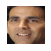

In [ ]:
	# plot
	pyplot.subplot(5, 5, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

In [ ]:
# face detection for the 5 Celebrity Faces Dataset
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
 
# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces
 
# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)
 
# load train dataset
trainX, trainy = load_dataset('/content/face_net_data/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/face_net_data/val/')
# save arrays to one file in compressed format
savez_compressed('celebrity-faces-dataset_1.npz', trainX, trainy, testX, testy)

>loaded 34 examples for class: Virat Kohli
>loaded 55 examples for class: Alia Bhatt
>loaded 56 examples for class: Courtney Cox
>loaded 53 examples for class: Roger Federer
>loaded 47 examples for class: Anushka Sharma
>loaded 63 examples for class: Zac Efron
>loaded 74 examples for class: Natalie Portman
>loaded 74 examples for class: Henry Cavill
>loaded 78 examples for class: Hugh Jackman
>loaded 60 examples for class: Camila Cabello
>loaded 40 examples for class: Tom Cruise
>loaded 21 examples for class: Kashyap
>loaded 67 examples for class: Claire Holt
>loaded 52 examples for class: Ellen Degeneres
>loaded 68 examples for class: Billie Eilish
>loaded 80 examples for class: Vijay Deverakonda
>loaded 70 examples for class: Hrithik Roshan
>loaded 60 examples for class: Charlize Theron
>loaded 49 examples for class: Elizabeth Olsen
>loaded 64 examples for class: Alexandra Daddario
>loaded 64 examples for class: Andy Samberg
>loaded 51 examples for class: Amitabh Bachchan
>loaded 83 

**Create Face Embeddings**

In [ ]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
 
# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]
 
# load the face dataset
data = load('/content/celebrity-faces-dataset_1.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model = load_model('/content/drive/MyDrive/Keras FaceNet model/facenet_keras.h5')
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (1792, 160, 160, 3) (1792,) (505, 160, 160, 3) (505,)
Loaded Model
(1792, 128)
(505, 128)


**Perform Face Classification**


In [ ]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('/content/5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=1792, test=505
Accuracy: train=100.000, test=100.000


**original face and the prediction**

Predicted: Ellen Degeneres (75.877)
Expected: Ellen Degeneres


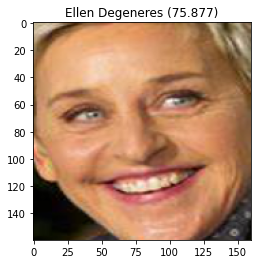

In [ ]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('/content/celebrity-faces-dataset_1.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('/content/5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

**Test set**

In [ ]:
# load train dataset
testX, testy = load_dataset('/content/face_net_data/test/')
print(testX.shape, testy.shape)
savez_compressed('test_set_1.npz', testX, testy)

>loaded 6 examples for class: Virat Kohli
>loaded 9 examples for class: Alia Bhatt
>loaded 8 examples for class: Courtney Cox
>loaded 9 examples for class: Roger Federer
>loaded 8 examples for class: Anushka Sharma
>loaded 10 examples for class: Zac Efron
>loaded 12 examples for class: Natalie Portman
>loaded 11 examples for class: Henry Cavill
>loaded 12 examples for class: Hugh Jackman
>loaded 10 examples for class: Camila Cabello
>loaded 7 examples for class: Tom Cruise
>loaded 3 examples for class: Kashyap
>loaded 10 examples for class: Claire Holt
>loaded 8 examples for class: Ellen Degeneres
>loaded 11 examples for class: Billie Eilish
>loaded 12 examples for class: Vijay Deverakonda
>loaded 11 examples for class: Hrithik Roshan
>loaded 9 examples for class: Charlize Theron
>loaded 8 examples for class: Elizabeth Olsen
>loaded 10 examples for class: Alexandra Daddario
>loaded 10 examples for class: Andy Samberg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 206 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 724 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 170 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 178 bytes but o

>loaded 9 examples for class: Amitabh Bachchan
>loaded 13 examples for class: Robert Downey Jr
>loaded 7 examples for class: Dwayne Johnson
>loaded 5 examples for class: Akshay Kumar
>loaded 8 examples for class: Margot Robbie
>loaded 12 examples for class: Priyanka Chopra
>loaded 12 examples for class: Brad Pitt
>loaded 7 examples for class: Lisa Kudrow
>loaded 4 examples for class: Marmik
>loaded 12 examples for class: Jessica Alba
(283, 160, 160, 3) (283,)


In [ ]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
 
# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]
 
# load the face dataset
data = load('/content/celebrity-faces-dataset_1.npz')
data_t = load('/content/test_set_1.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data_t['arr_0'], data_t['arr_1']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model = load_model('/content/drive/MyDrive/Keras FaceNet model/facenet_keras.h5')
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('test_t-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (1792, 160, 160, 3) (1792,) (283, 160, 160, 3) (283,)
Loaded Model
(1792, 128)
(283, 128)


In [ ]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('/content/test_t-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=1792, test=283
Accuracy: train=100.000, test=99.647


Predicted: Anushka Sharma (76.096)
Expected: Anushka Sharma


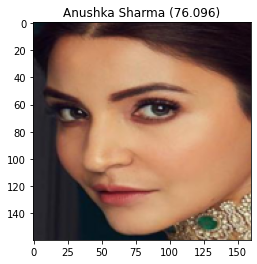

In [ ]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
# load faces
data = load('/content/test_set_1.npz')
testX_faces = data['arr_0']
# load face embeddings
data = load('/content/test_t-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()